# Health Insurance Fraud detection
#### Analysed by : Osafa Karim (osafa.karim@capgemini.com)
#### Data Scource : https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis#Test-1542969243754.csv


In [1]:
# import the required libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import time
pd.set_option('display.max_columns', 999)

##### loading the data sets in pandas data-frame

In [2]:
os.listdir()

['Train_Inpatientdata-1542865627584.csv',
 'Train_Outpatientdata-1542865627584.csv',
 'Test_Inpatientdata-1542969243754.csv',
 'Test_Beneficiarydata-1542969243754.csv',
 'train_10.csv',
 'Train-1542865627584.csv',
 'Train_Beneficiarydata-1542865627584.csv',
 'Test_Outpatientdata-1542969243754.csv',
 '.ipynb_checkpoints',
 '.git',
 'Health Insurance Fraud Detection.ipynb',
 'Test-1542969243754.csv']

In [3]:
df = {}
for a in os.listdir():
    if a[:5]  == 'Train':
        star_t = time.time()
        #df_name = 'df_'.join(a)
        df[a[:9]] = pd.read_csv(a) 
        end_t = time.time()
        print('File Name : ',a,
              '\n File size : ',os.path.getsize(a),
              '\n Time taken to load : ',end_t - star_t,
              '\n Loaded successfully !')

File Name :  Train_Inpatientdata-1542865627584.csv 
 File size :  8572555 
 Time taken to load :  0.2823669910430908 
 Loaded successfully !
File Name :  Train_Outpatientdata-1542865627584.csv 
 File size :  77391090 
 Time taken to load :  2.077608346939087 
 Loaded successfully !
File Name :  Train-1542865627584.csv 
 File size :  87094 
 Time taken to load :  0.015766620635986328 
 Loaded successfully !
File Name :  Train_Beneficiarydata-1542865627584.csv 
 File size :  11444821 
 Time taken to load :  0.35240983963012695 
 Loaded successfully !


In [4]:
df.keys()

dict_keys(['Train_Inp', 'Train_Out', 'Train-154', 'Train_Ben'])

In [5]:
type(df['Train_Inp'])

pandas.core.frame.DataFrame

In [6]:
df_train_inp = df['Train_Inp']

In [7]:
df_train_out = df['Train_Out']

In [8]:
df_train_label = df['Train-154'] 

In [9]:
df_train_ben = df['Train_Ben']

##### Let's view the stats for the train data sets

In [231]:
# deleting 
del(df)
#del(df_name)

###### Visualize and describe the BENEFICIARY data

In [11]:
df_train_ben.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [12]:
df_train_ben.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
BeneID                             138556 non-null object
DOB                                138556 non-null object
DOD                                1421 non-null object
Gender                             138556 non-null int64
Race                               138556 non-null int64
RenalDiseaseIndicator              138556 non-null object
State                              138556 non-null int64
County                             138556 non-null int64
NoOfMonths_PartACov                138556 non-null int64
NoOfMonths_PartBCov                138556 non-null int64
ChronicCond_Alzheimer              138556 non-null int64
ChronicCond_Heartfailure           138556 non-null int64
ChronicCond_KidneyDisease          138556 non-null int64
ChronicCond_Cancer                 138556 non-null int64
ChronicCond_ObstrPulmonary         138556 non-null int64
ChronicCond_Depression          

###### check for the nulls/missing values

In [13]:
len(df_train_ben[df_train_ben.isna().any(axis=1)])

137135

###### check for the columns having missing values

In [14]:

for a in df_train_ben.columns[df_train_ben.isna().any()].tolist():
    print(a,' has ',df_train_ben[a].isna().sum())

DOD  has  137135


In [15]:
df_train_ben.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [16]:
len(df_train_ben), len(df_train_ben['BeneID']) , len(df_train_ben['BeneID'].unique())

(138556, 138556, 138556)

###### So we have 138,556 beneficiers for analysis

In [17]:
#df_train_ben['Gender'].plot(kind='bar')

In [18]:
df_train_ben['Gender'].value_counts()

2    79106
1    59450
Name: Gender, dtype: int64

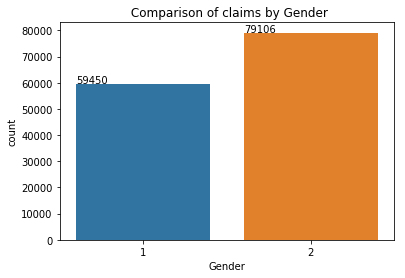

In [19]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Gender', data=df_train_ben)
plt.title(' Comparison of claims by Gender')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [20]:
df_train_ben['Race'].unique()

array([1, 2, 3, 5])

In [21]:
df_train_ben['Race'].value_counts()

1    117057
2     13538
3      5059
5      2902
Name: Race, dtype: int64

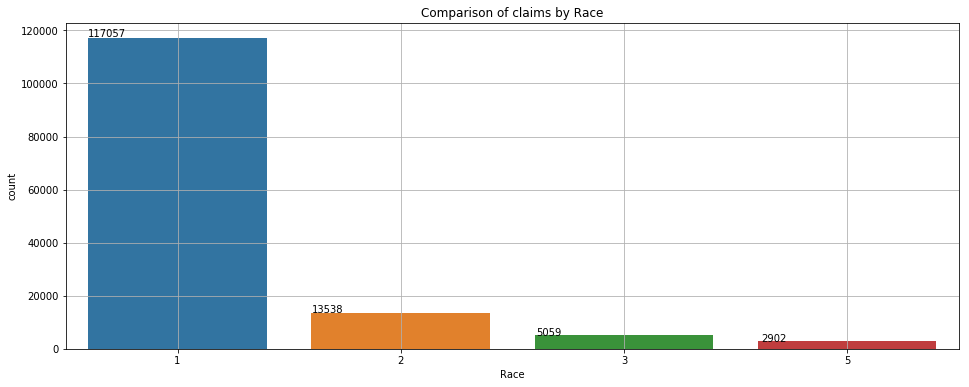

In [22]:
plt.figure(figsize=(16,6))
ax = sns.countplot(x = "Race", data=df_train_ben)
plt.title('Comparison of claims by Race')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.grid(True)


In [23]:
df = df_train_ben[['Race','Gender']].groupby(['Race','Gender']).count()

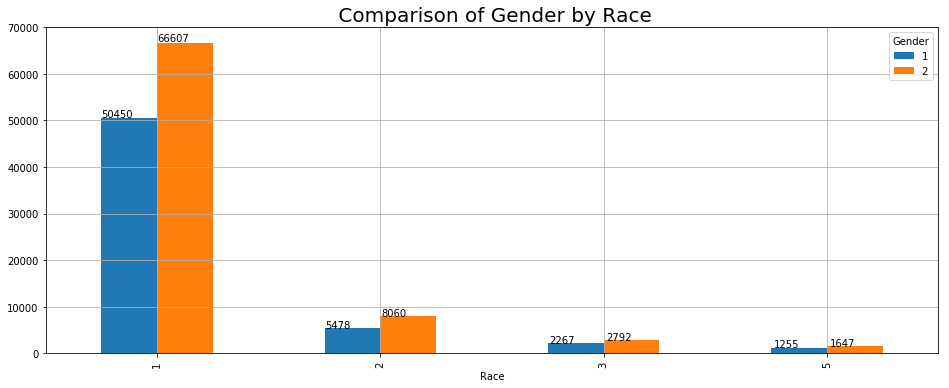

In [24]:
ax = pd.crosstab(df_train_ben['Race'],df_train_ben['Gender']).plot(kind = 'bar',figsize=(16,6))
plt.grid(True)
plt.title(" Comparison of Gender by Race",fontsize = 20)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

###### Visualize and describe the IN-Patient data

In [25]:
df_train_inp.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


In [26]:
df_train_inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
BeneID                    40474 non-null object
ClaimID                   40474 non-null object
ClaimStartDt              40474 non-null object
ClaimEndDt                40474 non-null object
Provider                  40474 non-null object
InscClaimAmtReimbursed    40474 non-null int64
AttendingPhysician        40362 non-null object
OperatingPhysician        23830 non-null object
OtherPhysician            4690 non-null object
AdmissionDt               40474 non-null object
ClmAdmitDiagnosisCode     40474 non-null object
DeductibleAmtPaid         39575 non-null float64
DischargeDt               40474 non-null object
DiagnosisGroupCode        40474 non-null object
ClmDiagnosisCode_1        40474 non-null object
ClmDiagnosisCode_2        40248 non-null object
ClmDiagnosisCode_3        39798 non-null object
ClmDiagnosisCode_4        38940 non-null object
ClmDiagnosisCode_5        37

In [27]:
in_missing_df = {}
for a in df_train_inp.columns[df_train_inp.isna().any()].tolist():
    #print(a,' has ',df_train_inp[a].isna().sum())
    in_missing_df[a] = df_train_inp[a].isna().sum()
    
in_missing_df = pd.DataFrame.from_dict(in_missing_df, orient = 'index', columns=['Count of missing values'])

In [28]:
in_missing_df

,Count of missing values
AttendingPhysician,112
OperatingPhysician,16644
OtherPhysician,35784
DeductibleAmtPaid,899
ClmDiagnosisCode_2,226
ClmDiagnosisCode_3,676
ClmDiagnosisCode_4,1534
ClmDiagnosisCode_5,2894
ClmDiagnosisCode_6,4838
ClmDiagnosisCode_7,7258


##### So from the above analysis it is imperative that we have to impute the data/fill in the missing values so that the information is not missed , analyses is not skewd and is statistically valid.

In [29]:
df_train_inp.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [30]:
len(df_train_inp['BeneID'].unique())

31289

In [31]:
# let's see how many of the benficiaries have multiple claims
df_bene_id = df_train_inp['BeneID'].value_counts()

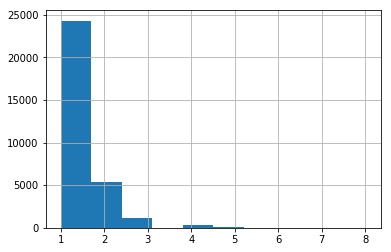

In [32]:
df_bene_id.hist()

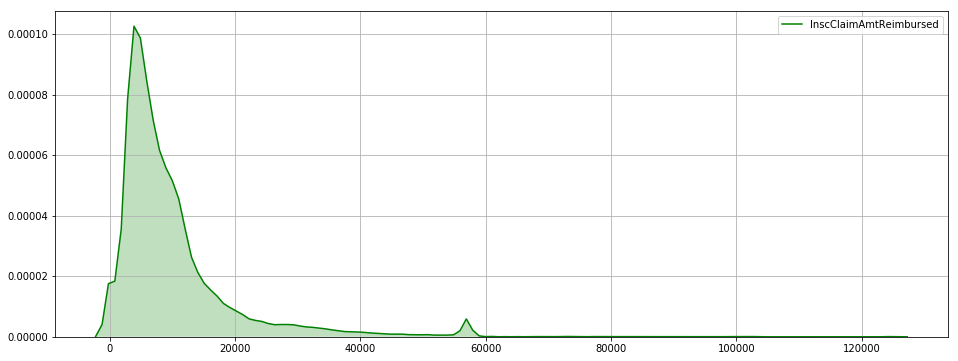

In [33]:
# Let's visualize InscClaimAmtReimbursed
plt.figure(figsize=(16,6))
sns.kdeplot(df_train_inp['InscClaimAmtReimbursed'], shade=True, color = 'g')
plt.grid(True)

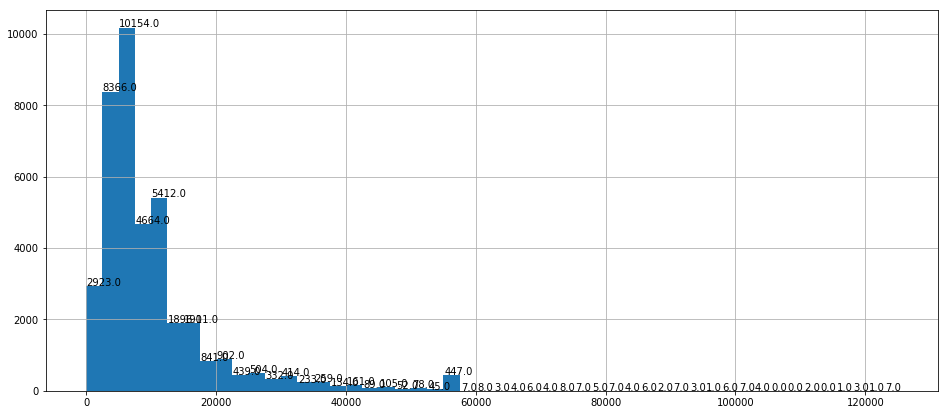

In [34]:
plt.figure(figsize=(16,7))
ax = df_train_inp['InscClaimAmtReimbursed'].hist(bins=50)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [35]:
# Provider
len(df_train_inp['Provider'].unique())

2092

In [36]:
df_provider_50 = pd.DataFrame(df_train_inp['Provider'].value_counts().head(50))

In [37]:
df_provider_50.T

,PRV52019,PRV55462,PRV54367,PRV53706,PRV55209,PRV56560,PRV54742,PRV55230,PRV52340,PRV51501,PRV56416,PRV52135,PRV54955,PRV51244,PRV51560,PRV54765,PRV53808,PRV51940,PRV57191,PRV52021,PRV52846,PRV52821,PRV55194,PRV52903,PRV52120,PRV51390,PRV52100,PRV51146,PRV52123,PRV53712,PRV51471,PRV51145,PRV55019,PRV54986,PRV51614,PRV53692,PRV52574,PRV52642,PRV55215,PRV51948,PRV54894,PRV52178,PRV53769,PRV54936,PRV53401,PRV55849,PRV55435,PRV51578,PRV56647,PRV52985
Provider,516,386,322,282,275,248,231,225,224,223,214,210,205,200,200,196,195,193,185,181,175,173,169,167,165,164,164,162,162,161,161,161,158,153,148,146,146,146,143,143,138,133,132,131,130,128,128,122,121,121


Text(0.5, 0, 'Insurance Providers ')

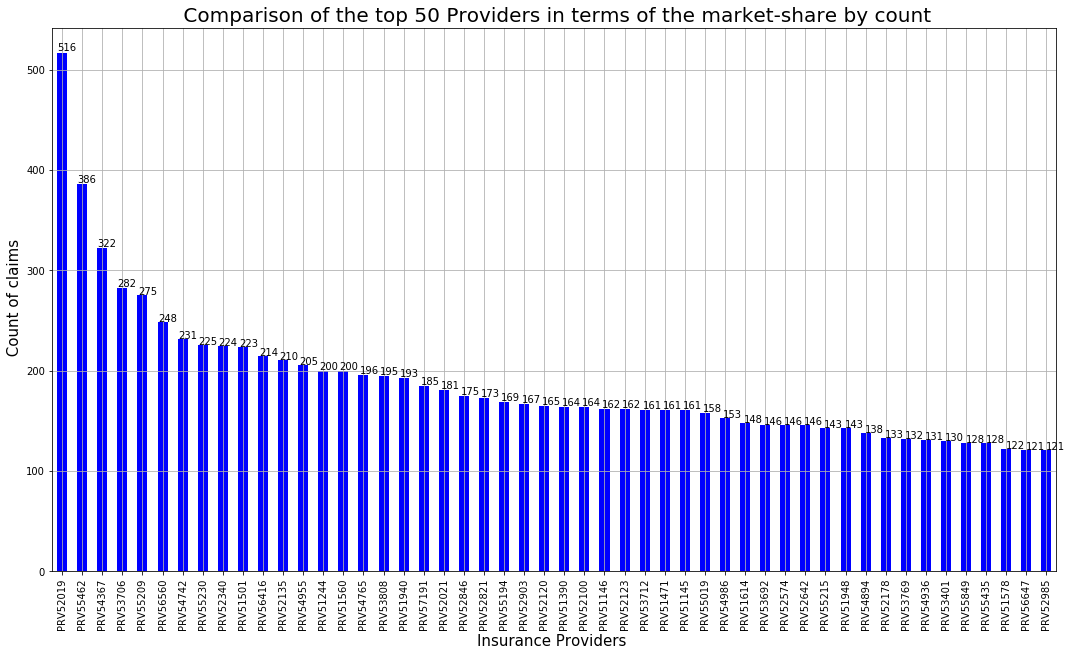

In [38]:
# let's plot top 50 providers
df_provider = (df_train_inp['Provider'].value_counts().head(50))
ax = df_provider.T.plot(kind='bar', figsize = (18, 10) , grid = True ,colormap='bwr')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title(" Comparison of the top 50 Providers in terms of the market-share by count",fontsize=20 )
plt.ylabel(' Count of claims', fontsize = 15)
plt.xlabel('Insurance Providers ', fontsize = 15)

In [39]:
# AttendingPhysician
len(df_train_inp['AttendingPhysician'].unique())

11605

In [40]:
df_attending_physician = df_train_inp['AttendingPhysician'].value_counts().head(50)

Text(0.5, 0, 'Physician ')

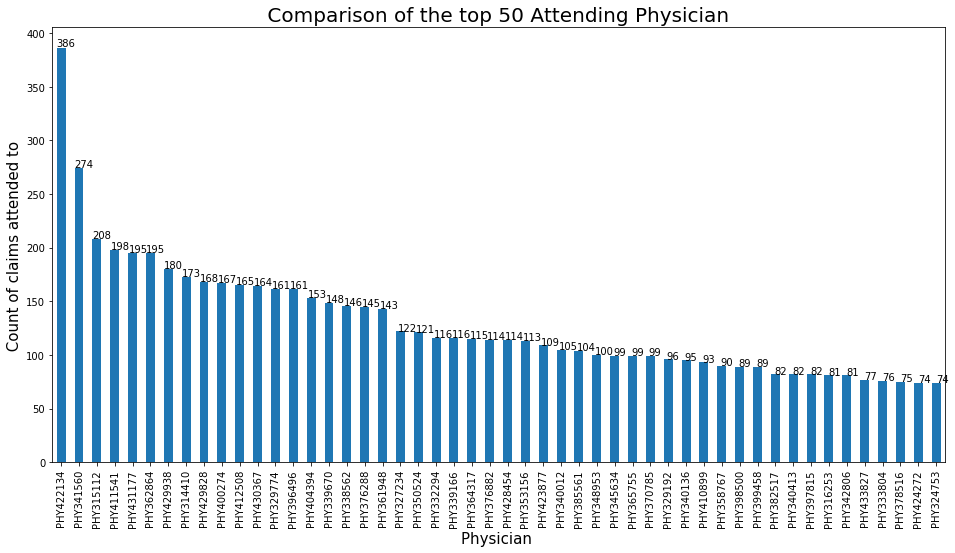

In [41]:
ax = df_attending_physician.T.plot(kind = 'bar' , figsize=(16,8))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title(" Comparison of the top 50 Attending Physician ",fontsize=20 )
plt.ylabel(' Count of claims attended to ', fontsize = 15)
plt.xlabel('Physician ', fontsize = 15)

###### Visualize and describe the Out-Patient data

In [42]:
df_train_out.shape

(517737, 27)

In [43]:
df_train_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [44]:
df_train_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
BeneID                    517737 non-null object
ClaimID                   517737 non-null object
ClaimStartDt              517737 non-null object
ClaimEndDt                517737 non-null object
Provider                  517737 non-null object
InscClaimAmtReimbursed    517737 non-null int64
AttendingPhysician        516341 non-null object
OperatingPhysician        90617 non-null object
OtherPhysician            195046 non-null object
ClmDiagnosisCode_1        507284 non-null object
ClmDiagnosisCode_2        322357 non-null object
ClmDiagnosisCode_3        203257 non-null object
ClmDiagnosisCode_4        125596 non-null object
ClmDiagnosisCode_5        74344 non-null object
ClmDiagnosisCode_6        48756 non-null object
ClmDiagnosisCode_7        32961 non-null object
ClmDiagnosisCode_8        22912 non-null object
ClmDiagnosisCode_9        14838 non-null object
ClmDiagnosisCo

In [45]:
# check for the features of the in-patient and not in out-patient dataset
miss_col_out = []
for a in df_train_inp.columns.tolist():
    if a not in df_train_out.columns.tolist():
        miss_col_out.append(a)

In [46]:
# check for the features of the out-patient and not in in-patient dataset
miss_col_in = []
for a in df_train_out.columns.tolist():
    if a not in df_train_inp.columns.tolist():
        miss_col_in.append(a)

In [47]:
miss_col_out , miss_col_in

(['AdmissionDt', 'DischargeDt', 'DiagnosisGroupCode'], [])

##### *** Important : So what we see here , is that the in-patient and out-patient data-sets have overlapping features. Hence we can merge (union) the 2 datasets and add some features from the beneficiary datasets.

In [48]:
df_new = pd.concat([df_train_inp, df_train_out], ignore_index=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [49]:
df_new.shape

(558211, 30)

##### Check for the common features between in-out-patient and the benficiary dataset

In [50]:
# features present in the in-out and absent in the ben
ftr_present_inout_miss_ben = []
for a in df_new.columns.tolist():
    if a in df_train_ben.columns.tolist():
        ftr_present_inout_miss_ben.append(a)

In [51]:
# features present in the beneficiary but absent in the in-out-patient
ftr_present_ben_miss_inout = []
for a in df_train_ben.columns.tolist():
    if a in df_new.columns.tolist():
        ftr_present_ben_miss_inout.append(a)

##### Merge all separate datasets to form one consolidated feature set which can be used in the predictive model.

In [52]:
train = pd.merge(df_new, df_train_ben)

In [53]:
df_new.shape, df_train_inp.shape, df_train_out.shape, df_train_label.shape

((558211, 30), (40474, 30), (517737, 27), (5410, 2))

In [54]:
train.head()

,AdmissionDt,AttendingPhysician,BeneID,ClaimEndDt,ClaimID,ClaimStartDt,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,DiagnosisGroupCode,DischargeDt,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,Provider,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,2009-04-12,PHY390922,BENE11001,2009-04-18,CLM46614,2009-04-12,7866,1970,NaN,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,201,2009-04-18,26000,NaN,NaN,PRV55912,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,2009-08-31,PHY318495,BENE11001,2009-09-02,CLM66048,2009-08-31,6186,6186,NaN,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1068.0,750,2009-09-02,5000,PHY318495,NaN,PRV55907,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,2009-09-17,PHY372395,BENE11001,2009-09-20,CLM68358,2009-09-17,29590,29623,NaN,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,883,2009-09-20,5000,NaN,PHY324689,PRV56046,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,2009-02-14,PHY369659,BENE11011,2009-02-22,CLM38412,2009-02-14,431,43491,NaN,2762,7843,32723,V1041,4254,25062,40390,4019,331.0,NaN,NaN,NaN,NaN,NaN,1068.0,067,2009-02-22,5000,PHY392961,PHY349768,PRV52405,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,NaN,PHY379398,BENE11011,2009-01-18,CLM144521,2009-01-18,78900,78969,NaN,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,50,NaN,NaN,PRV52314,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320


In [55]:
# check for the providers , if they there are matching labels or not ?
len(train['Provider'].unique()) , len(df_train_label['Provider'].unique())

(5410, 5410)

In [56]:
df_train_label.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


###### So we have as many labels as providers.

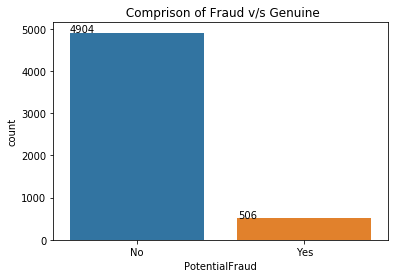

In [57]:
plt.title(' Comprison of Fraud v/s Genuine')
ax = sns.countplot(x = 'PotentialFraud', data=df_train_label)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

##### So this is an imbalanced dataset , where we see the prevalance of one class over the other. 

In [58]:
ratio_of_imbalance = len(df_train_label[df_train_label['PotentialFraud'] == 'Yes'])/len(df_train_label[df_train_label['PotentialFraud'] == 'No'])#506/4904

In [59]:
print('The ration of imbalance is : ',round(ratio_of_imbalance,3))

The ration of imbalance is :  0.103


###### The scale of imbalance is not of the order of 1:100 or 1:90... so we can still work with dataset without augmentation (oversampling/undersampling). Instead the CV technique shoiuld suffice for the class-imbalance.

###### Data Preprocessing : Imputing the missing values, Scaling , transformation of categorical to nummerical and transformation. 

In [60]:
train.shape

(558211, 54)

In [61]:
train.head(10).to_csv('train_10.csv')

In [62]:
# check for the missing values
train.isna().sum()

AdmissionDt                        517737
AttendingPhysician                   1508
BeneID                                  0
ClaimEndDt                              0
ClaimID                                 0
ClaimStartDt                            0
ClmAdmitDiagnosisCode              412312
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_10                553201
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                 558202
ClmProcedureCode_6                 558211
DeductibleAmtPaid                 

In [63]:
# dropping DOD column
train.drop('DOD', axis=1, inplace=True)

##### At very rough estimate , let's impute the missing values with mode of the corresponding feature.

In [64]:
train.isna().sum()

AdmissionDt                        517737
AttendingPhysician                   1508
BeneID                                  0
ClaimEndDt                              0
ClaimID                                 0
ClaimStartDt                            0
ClmAdmitDiagnosisCode              412312
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_10                553201
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmProcedureCode_1                 534901
ClmProcedureCode_2                 552721
ClmProcedureCode_3                 557242
ClmProcedureCode_4                 558093
ClmProcedureCode_5                 558202
ClmProcedureCode_6                 558211
DeductibleAmtPaid                 

In [65]:
list_cols_impute = []
for col in train.columns.tolist():
    if train[col].isna().sum() > 0 :
        list_cols_impute.append(col)

In [66]:
list_cols_impute

['AdmissionDt',
 'AttendingPhysician',
 'ClmAdmitDiagnosisCode',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_10',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_6',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClmDiagnosisCode_9',
 'ClmProcedureCode_1',
 'ClmProcedureCode_2',
 'ClmProcedureCode_3',
 'ClmProcedureCode_4',
 'ClmProcedureCode_5',
 'ClmProcedureCode_6',
 'DeductibleAmtPaid',
 'DiagnosisGroupCode',
 'DischargeDt',
 'OperatingPhysician',
 'OtherPhysician']

In [67]:
# AdmissionDt 
imp_AdmissionDt = train['AdmissionDt'].mode().values[0]

In [68]:
imp_AdmissionDt

'2009-02-10'

In [69]:
train['AdmissionDt'].fillna(imp_AdmissionDt, inplace=True)

In [70]:
# AttendingPhysician
imp_AttendingPhysician = train['AttendingPhysician'].mode().values[0]
imp_AttendingPhysician

'PHY330576'

In [71]:
train['AttendingPhysician'].fillna(imp_AttendingPhysician, inplace=True)

In [72]:
# 'ClmAdmitDiagnosisCode'
imp_ClmAdmitDiagnosisCode = train['ClmAdmitDiagnosisCode'].mode().values[0]
train['ClmAdmitDiagnosisCode'].fillna(imp_ClmAdmitDiagnosisCode, inplace=True)

In [73]:
# 'ClmDiagnosisCode_1'
imp_ClmDiagnosisCode_1 = train['ClmDiagnosisCode_1'].mode().values[0]
train['ClmDiagnosisCode_1'].fillna(imp_ClmDiagnosisCode_1, inplace=True)

In [74]:
# 'ClmDiagnosisCode_10'
imp_ClmDiagnosisCode_10 = train['ClmDiagnosisCode_10'].mode().values[0]
train['ClmDiagnosisCode_10'].fillna(imp_ClmDiagnosisCode_10, inplace=True)

In [75]:
# 'ClmDiagnosisCode_2'
imp_ClmDiagnosisCode_2 = train['ClmDiagnosisCode_2'].mode().values[0]
train['ClmDiagnosisCode_2'].fillna(imp_ClmDiagnosisCode_2, inplace=True)

In [76]:
# 'ClmDiagnosisCode_3'
imp_ClmDiagnosisCode_3 = train['ClmDiagnosisCode_3'].mode().values[0]
train['ClmDiagnosisCode_3'].fillna(imp_ClmDiagnosisCode_3, inplace=True)

In [77]:
# 'ClmDiagnosisCode_4'
imp_ClmDiagnosisCode_4 = train['ClmDiagnosisCode_4'].mode().values[0]
train['ClmDiagnosisCode_4'].fillna(imp_ClmDiagnosisCode_4, inplace=True)

In [78]:
# 'ClmDiagnosisCode_5'
imp_ClmDiagnosisCode_5 = train['ClmDiagnosisCode_5'].mode().values[0]
train['ClmDiagnosisCode_5'].fillna(imp_ClmDiagnosisCode_5, inplace=True)

In [79]:
# 'ClmDiagnosisCode_6'
imp_ClmDiagnosisCode_6 = train['ClmDiagnosisCode_6'].mode().values[0]
train['ClmDiagnosisCode_6'].fillna(imp_ClmDiagnosisCode_6, inplace=True)

In [80]:
# 'ClmDiagnosisCode_7'
imp_ClmDiagnosisCode_7 = train['ClmDiagnosisCode_7'].mode().values[0]
train['ClmDiagnosisCode_7'].fillna(imp_ClmDiagnosisCode_7, inplace=True)

In [81]:
# 'ClmDiagnosisCode_8'
imp_ClmDiagnosisCode_8 = train['ClmDiagnosisCode_8'].mode().values[0]
train['ClmDiagnosisCode_8'].fillna(imp_ClmDiagnosisCode_8, inplace=True)

In [82]:
# 'ClmDiagnosisCode_9'
imp_ClmDiagnosisCode_9 = train['ClmDiagnosisCode_9'].mode().values[0]
train['ClmDiagnosisCode_9'].fillna(imp_ClmDiagnosisCode_9, inplace=True)

In [83]:
# 'ClmProcedureCode_1'
imp_ClmProcedureCode_1 = train['ClmProcedureCode_1'].mode().values[0]
train['ClmProcedureCode_1'].fillna(imp_ClmProcedureCode_1, inplace=True)

In [84]:
# 'ClmProcedureCode_2'
imp_ClmProcedureCode_2 = train['ClmProcedureCode_2'].mode().values[0]
train['ClmProcedureCode_2'].fillna(imp_ClmProcedureCode_2, inplace=True)

In [85]:
# 'ClmProcedureCode_3'
imp_ClmProcedureCode_3 = train['ClmProcedureCode_3'].mode().values[0]
train['ClmProcedureCode_3'].fillna(imp_ClmProcedureCode_3, inplace=True)

In [86]:
# 'ClmProcedureCode_4'
imp_ClmProcedureCode_4 = train['ClmProcedureCode_4'].mode().values[0]
train['ClmProcedureCode_4'].fillna(imp_ClmProcedureCode_4, inplace=True)

In [87]:
# 'ClmProcedureCode_5'
imp_ClmProcedureCode_5 = train['ClmProcedureCode_5'].mode().values[0]
train['ClmProcedureCode_5'].fillna(imp_ClmProcedureCode_5, inplace=True)

In [88]:
# 'ClmProcedureCode_6'
train.drop('ClmProcedureCode_6', axis=1, inplace=True)

In [89]:
# 'DeductibleAmtPaid'
imp_DeductibleAmtPaid = train['DeductibleAmtPaid'].mode().values[0]
train['DeductibleAmtPaid'].fillna(imp_DeductibleAmtPaid, inplace=True)

In [90]:
# 'DiagnosisGroupCode'
imp_DiagnosisGroupCode = train['DiagnosisGroupCode'].mode().values[0]
train['DiagnosisGroupCode'].fillna(imp_DiagnosisGroupCode, inplace=True)

In [91]:
# DischargeDt
imp_DischargeDt = train['DischargeDt'].mode().values[0]
train['DischargeDt'].fillna(imp_DischargeDt, inplace=True)

In [92]:
# OperatingPhysician
imp_OperatingPhysician = train['OperatingPhysician'].mode().values[0]
train['OperatingPhysician'].fillna(imp_OperatingPhysician, inplace=True)

In [93]:
# OtherPhysician
imp_OtherPhysician = train['OtherPhysician'].mode().values[0]
train['OtherPhysician'].fillna(imp_OtherPhysician, inplace=True)

In [94]:
train.isna().sum()

AdmissionDt                        0
AttendingPhysician                 0
BeneID                             0
ClaimEndDt                         0
ClaimID                            0
ClaimStartDt                       0
ClmAdmitDiagnosisCode              0
ClmDiagnosisCode_1                 0
ClmDiagnosisCode_10                0
ClmDiagnosisCode_2                 0
ClmDiagnosisCode_3                 0
ClmDiagnosisCode_4                 0
ClmDiagnosisCode_5                 0
ClmDiagnosisCode_6                 0
ClmDiagnosisCode_7                 0
ClmDiagnosisCode_8                 0
ClmDiagnosisCode_9                 0
ClmProcedureCode_1                 0
ClmProcedureCode_2                 0
ClmProcedureCode_3                 0
ClmProcedureCode_4                 0
ClmProcedureCode_5                 0
DeductibleAmtPaid                  0
DiagnosisGroupCode                 0
DischargeDt                        0
InscClaimAmtReimbursed             0
OperatingPhysician                 0
O

In [99]:
train.head(5)

,AdmissionDt,AttendingPhysician,BeneID,ClaimEndDt,ClaimID,ClaimStartDt,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,DiagnosisGroupCode,DischargeDt,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,Provider,DOB,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,2009-04-12,PHY390922,BENE11001,2009-04-18,CLM46614,2009-04-12,7866,1970,4019,4019,5853,7843,2768,71590,2724,19889,5849,9904.0,4019.0,4019.0,4019.0,4139.0,1068.0,201,2009-04-18,26000,PHY330576,PHY412132,PRV55912,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,2009-08-31,PHY318495,BENE11001,2009-09-02,CLM66048,2009-08-31,6186,6186,4019,2948,56400,4019,4019,4019,4019,4019,4019,7092.0,4019.0,4019.0,4019.0,4139.0,1068.0,750,2009-09-02,5000,PHY318495,PHY412132,PRV55907,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,2009-09-17,PHY372395,BENE11001,2009-09-20,CLM68358,2009-09-17,29590,29623,4019,30390,71690,34590,V1581,32723,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,1068.0,883,2009-09-20,5000,PHY330576,PHY324689,PRV56046,1943-01-01,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,2009-02-14,PHY369659,BENE11011,2009-02-22,CLM38412,2009-02-14,431,43491,4019,2762,7843,32723,V1041,4254,25062,40390,4019,331.0,4019.0,4019.0,4019.0,4139.0,1068.0,067,2009-02-22,5000,PHY392961,PHY349768,PRV52405,1914-03-01,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,2009-02-10,PHY379398,BENE11011,2009-01-18,CLM144521,2009-01-18,78900,78969,4019,78701,V5866,59389,2449,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,2009-02-11,50,PHY330576,PHY412132,PRV52314,1914-03-01,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320


In [96]:
train.shape

(558211, 52)

In [97]:
# dropping few features which have no implications on the predictiveness
# BeneID , ClaimID , 
# Removing all the date columns for simplicity at this stage (POC) , however this will be very essential in the real model
# AdmissionDt , ClaimEndDt , ClaimStartDt, DischargeDt, DOB 

In [100]:
redundant_feat = ['BeneID','ClaimID','AdmissionDt','ClaimEndDt','ClaimStartDt','DischargeDt','DOB']

In [101]:
redundant_feat

['BeneID',
 'ClaimID',
 'AdmissionDt',
 'ClaimEndDt',
 'ClaimStartDt',
 'DischargeDt',
 'DOB']

In [102]:
train.drop(redundant_feat, axis=1, inplace=True)

In [103]:
train.shape

(558211, 45)

In [104]:
train.head()

,AttendingPhysician,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,DiagnosisGroupCode,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,Provider,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,PHY390922,7866,1970,4019,4019,5853,7843,2768,71590,2724,19889,5849,9904.0,4019.0,4019.0,4019.0,4139.0,1068.0,201,26000,PHY330576,PHY412132,PRV55912,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,PHY318495,6186,6186,4019,2948,56400,4019,4019,4019,4019,4019,4019,7092.0,4019.0,4019.0,4019.0,4139.0,1068.0,750,5000,PHY318495,PHY412132,PRV55907,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,PHY372395,29590,29623,4019,30390,71690,34590,V1581,32723,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,1068.0,883,5000,PHY330576,PHY324689,PRV56046,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,PHY369659,431,43491,4019,2762,7843,32723,V1041,4254,25062,40390,4019,331.0,4019.0,4019.0,4019.0,4139.0,1068.0,067,5000,PHY392961,PHY349768,PRV52405,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,PHY379398,78900,78969,4019,78701,V5866,59389,2449,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,50,PHY330576,PHY412132,PRV52314,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320


###### Since the Dataset here is quite large, over 550K instances and 45 features , to train a model with limited resources of my laptop , it's not really possible. Hence , for the sake of this POC i will sample the dataset of 1000 claims and then use 700 for training 200 for validation and 100 for testing.

In [105]:
X_train_1000 = train.sample(n=1000, random_state=313)

In [106]:
X_train_1000.shape

(1000, 45)

In [107]:
X_train_1000.head()

,AttendingPhysician,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,DiagnosisGroupCode,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,Provider,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
434084,PHY351899,V7612,71535,4019,4019,4019,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,30,PHY330576,PHY412132,PRV51404,1,1,0,54,0,12,12,2,2,2,2,2,2,1,1,2,1,2,0,0,1330,130
72994,PHY330231,43491,99812,4019,7295,5589,58881,72252,57510,79021,25083,2989,9904.0,4019.0,4019.0,4019.0,4139.0,1068.0,922,6000,PHY330576,PHY412132,PRV51863,2,1,0,6,530,12,12,2,2,1,2,2,2,1,1,2,2,1,6000,1068,800,100
72591,PHY357120,V7612,71526,4019,4019,4019,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,80,PHY330576,PHY338032,PRV51459,2,1,Y,5,200,12,12,2,2,1,2,2,1,1,1,2,1,2,25360,1068,80,10
433217,PHY406323,78791,56203,4019,2859,60000,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,40,PHY406323,PHY412132,PRV53689,2,1,0,21,30,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,440,500
388286,PHY398371,V7612,2723,4019,4019,79021,2449,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,20,PHY418593,PHY412132,PRV57335,1,1,0,50,260,12,12,2,1,2,2,2,2,1,2,2,2,1,0,0,400,850


In [128]:
X_target_1000 = X_train_1000['Provider'].apply(lambda x: df_train_label[df_train_label['Provider'] == x]['PotentialFraud'].values[0])

In [129]:
X_target_1000.shape

(1000,)

In [130]:
X_target_1000.head()

434084     No
72994      No
72591     Yes
433217     No
388286    Yes
Name: Provider, dtype: object

In [131]:
X_train_1000.head()

,AttendingPhysician,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,DiagnosisGroupCode,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,Provider,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
434084,PHY351899,V7612,71535,4019,4019,4019,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,30,PHY330576,PHY412132,PRV51404,1,1,0,54,0,12,12,2,2,2,2,2,2,1,1,2,1,2,0,0,1330,130
72994,PHY330231,43491,99812,4019,7295,5589,58881,72252,57510,79021,25083,2989,9904.0,4019.0,4019.0,4019.0,4139.0,1068.0,922,6000,PHY330576,PHY412132,PRV51863,2,1,0,6,530,12,12,2,2,1,2,2,2,1,1,2,2,1,6000,1068,800,100
72591,PHY357120,V7612,71526,4019,4019,4019,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,80,PHY330576,PHY338032,PRV51459,2,1,Y,5,200,12,12,2,2,1,2,2,1,1,1,2,1,2,25360,1068,80,10
433217,PHY406323,78791,56203,4019,2859,60000,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,40,PHY406323,PHY412132,PRV53689,2,1,0,21,30,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,440,500
388286,PHY398371,V7612,2723,4019,4019,79021,2449,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,20,PHY418593,PHY412132,PRV57335,1,1,0,50,260,12,12,2,1,2,2,2,2,1,2,2,2,1,0,0,400,850


In [137]:
X_train_1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 434084 to 414519
Data columns (total 45 columns):
AttendingPhysician                 1000 non-null object
ClmAdmitDiagnosisCode              1000 non-null object
ClmDiagnosisCode_1                 1000 non-null object
ClmDiagnosisCode_10                1000 non-null object
ClmDiagnosisCode_2                 1000 non-null object
ClmDiagnosisCode_3                 1000 non-null object
ClmDiagnosisCode_4                 1000 non-null object
ClmDiagnosisCode_5                 1000 non-null object
ClmDiagnosisCode_6                 1000 non-null object
ClmDiagnosisCode_7                 1000 non-null object
ClmDiagnosisCode_8                 1000 non-null object
ClmDiagnosisCode_9                 1000 non-null object
ClmProcedureCode_1                 1000 non-null float64
ClmProcedureCode_2                 1000 non-null float64
ClmProcedureCode_3                 1000 non-null float64
ClmProcedureCode_4                 1000 non

###### Convert the categorical values to nummerical values

In [132]:
X_train_1000_1 = pd.get_dummies(X_train_1000)

In [133]:
X_train_1000_1.shape

(1000, 4309)

In [134]:
X_train_1000_1.head()

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,InscClaimAmtReimbursed,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,AttendingPhysician_PHY311011,AttendingPhysician_PHY311115,AttendingPhysician_PHY311170,AttendingPhysician_PHY311219,AttendingPhysician_PHY311343,AttendingPhysician_PHY311407,AttendingPhysician_PHY311591,AttendingPhysician_PHY311624,AttendingPhysician_PHY311788,AttendingPhysician_PHY311944,AttendingPhysician_PHY311980,AttendingPhysician_PHY312015,AttendingPhysician_PHY312060,AttendingPhysician_PHY312145,AttendingPhysician_PHY312173,AttendingPhysician_PHY312306,AttendingPhysician_PHY312479,AttendingPhysician_PHY313278,AttendingPhysician_PHY313547,AttendingPhysician_PHY313692,AttendingPhysician_PHY313784,AttendingPhysician_PHY313796,AttendingPhysician_PHY313873,AttendingPhysician_PHY314140,AttendingPhysician_PHY314206,AttendingPhysician_PHY314379,AttendingPhysician_PHY314497,AttendingPhysician_PHY314787,AttendingPhysician_PHY314853,AttendingPhysician_PHY314890,AttendingPhysician_PHY315012,AttendingPhysician_PHY315075,AttendingPhysician_PHY315112,AttendingPhysician_PHY315344,AttendingPhysician_PHY315424,AttendingPhysician_PHY315437,AttendingPhysician_PHY315468,AttendingPhysician_PHY315482,AttendingPhysician_PHY315625,AttendingPhysician_PHY315746,AttendingPhysician_PHY315938,AttendingPhysician_PHY315964,AttendingPhysician_PHY316051,AttendingPhysician_PHY316234,AttendingPhysician_PHY316243,AttendingPhysician_PHY316611,AttendingPhysician_PHY316734,AttendingPhysician_PHY316803,AttendingPhysician_PHY316974,AttendingPhysician_PHY317078,AttendingPhysician_PHY317185,AttendingPhysician_PHY317224,AttendingPhysician_PHY317267,AttendingPhysician_PHY317274,AttendingPhysician_PHY317502,AttendingPhysician_PHY317557,AttendingPhysician_PHY317833,AttendingPhysician_PHY317953,AttendingPhysician_PHY318032,AttendingPhysician_PHY318111,AttendingPhysician_PHY318396,AttendingPhysician_PHY318398,AttendingPhysician_PHY318603,AttendingPhysician_PHY318607,AttendingPhysician_PHY318667,AttendingPhysician_PHY318773,AttendingPhysician_PHY318942,AttendingPhysician_PHY319060,AttendingPhysician_PHY319349,AttendingPhysician_PHY319554,AttendingPhysician_PHY319831,AttendingPhysician_PHY319878,AttendingPhysician_PHY319973,AttendingPhysician_PHY320084,AttendingPhysician_PHY320108,AttendingPhysician_PHY320191,AttendingPhysician_PHY320280,AttendingPhysician_PHY320282,AttendingPhysician_PHY320581,AttendingPhysician_PHY320958,AttendingPhysician_PHY321450,AttendingPhysician_PHY321699,AttendingPhysician_PHY321723,AttendingPhysician_PHY321954,AttendingPhysician_PHY322054,AttendingPhysician_PHY322105,AttendingPhysician_PHY322358,AttendingPhysician_PHY322371,AttendingPhysician_PHY322681,AttendingPhysician_PHY322729,AttendingPhysician_PHY322760,AttendingPhysician_PHY322816,AttendingPhysician_PHY322821,AttendingPhysician_PHY322944,AttendingPhysician_PHY323143,AttendingPhysician_PHY323230,AttendingPhysician_PHY323318,AttendingPhysician_PHY323447,AttendingPhysician_PHY323928,AttendingPhysician_PHY323974,AttendingPhysician_PHY324060,AttendingPhysician_PHY324112,AttendingPhysician_PHY324335,AttendingPhysician_PHY324500,AttendingPhysician_PHY324869,AttendingPhysician_PHY324916,AttendingPhysician_PHY325176,AttendingPhysician_PHY325217,AttendingPhysician_PHY325260,AttendingPhysician_PHY325389,AttendingPhysician_PHY325750,AttendingPhysician_PHY325831,AttendingPhysician_PHY325877,AttendingPhysician_PHY325885,AttendingPhysician_PHY325937,AttendingPhysician_PHY326118,AttendingPhysician_PHY326157,AttendingPhysician_PHY326274,AttendingPhysicia

In [165]:
X_train_1000.head()

,AttendingPhysician,ClmAdmitDiagnosisCode,ClmDiagnosisCode_1,ClmDiagnosisCode_10,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,DiagnosisGroupCode,InscClaimAmtReimbursed,OperatingPhysician,OtherPhysician,Provider,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
434084,PHY351899,V7612,71535,4019,4019,4019,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,30,PHY330576,PHY412132,PRV51404,1,1,0,54,0,12,12,2,2,2,2,2,2,1,1,2,1,2,0,0,1330,130
72994,PHY330231,43491,99812,4019,7295,5589,58881,72252,57510,79021,25083,2989,9904.0,4019.0,4019.0,4019.0,4139.0,1068.0,922,6000,PHY330576,PHY412132,PRV51863,2,1,0,6,530,12,12,2,2,1,2,2,2,1,1,2,2,1,6000,1068,800,100
72591,PHY357120,V7612,71526,4019,4019,4019,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,80,PHY330576,PHY338032,PRV51459,2,1,Y,5,200,12,12,2,2,1,2,2,1,1,1,2,1,2,25360,1068,80,10
433217,PHY406323,78791,56203,4019,2859,60000,4019,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,40,PHY406323,PHY412132,PRV53689,2,1,0,21,30,12,12,1,2,2,2,2,2,2,2,2,2,2,0,0,440,500
388286,PHY398371,V7612,2723,4019,4019,79021,2449,4019,4019,4019,4019,4019,9904.0,4019.0,4019.0,4019.0,4139.0,0.0,882,20,PHY418593,PHY412132,PRV57335,1,1,0,50,260,12,12,2,1,2,2,2,2,1,2,2,2,1,0,0,400,850


In [ ]:
# 'AttendingPhysician' , 'ClmAdmitDiagnosisCode', 'OperatingPhysician', 'OtherPhysician', 'Provider','RenalDiseaseIndicator', ''

In [178]:
#X_train_1000_1 = pd.get_dummies(X_train_1000[['AttendingPhysician' , 'ClmAdmitDiagnosisCode', 'OperatingPhysician', 'OtherPhysician', 'Provider','RenalDiseaseIndicator']])
X_train_1000_1 = pd.get_dummies(X_train_1000)

In [179]:
X_train_1000_1.shape

(1000, 4309)

In [183]:
X_train_1000_1.head()

,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,DeductibleAmtPaid,InscClaimAmtReimbursed,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,AttendingPhysician_PHY311011,AttendingPhysician_PHY311115,AttendingPhysician_PHY311170,AttendingPhysician_PHY311219,AttendingPhysician_PHY311343,AttendingPhysician_PHY311407,AttendingPhysician_PHY311591,AttendingPhysician_PHY311624,AttendingPhysician_PHY311788,AttendingPhysician_PHY311944,AttendingPhysician_PHY311980,AttendingPhysician_PHY312015,AttendingPhysician_PHY312060,AttendingPhysician_PHY312145,AttendingPhysician_PHY312173,AttendingPhysician_PHY312306,AttendingPhysician_PHY312479,AttendingPhysician_PHY313278,AttendingPhysician_PHY313547,AttendingPhysician_PHY313692,AttendingPhysician_PHY313784,AttendingPhysician_PHY313796,AttendingPhysician_PHY313873,AttendingPhysician_PHY314140,AttendingPhysician_PHY314206,AttendingPhysician_PHY314379,AttendingPhysician_PHY314497,AttendingPhysician_PHY314787,AttendingPhysician_PHY314853,AttendingPhysician_PHY314890,AttendingPhysician_PHY315012,AttendingPhysician_PHY315075,AttendingPhysician_PHY315112,AttendingPhysician_PHY315344,AttendingPhysician_PHY315424,AttendingPhysician_PHY315437,AttendingPhysician_PHY315468,AttendingPhysician_PHY315482,AttendingPhysician_PHY315625,AttendingPhysician_PHY315746,AttendingPhysician_PHY315938,AttendingPhysician_PHY315964,AttendingPhysician_PHY316051,AttendingPhysician_PHY316234,AttendingPhysician_PHY316243,AttendingPhysician_PHY316611,AttendingPhysician_PHY316734,AttendingPhysician_PHY316803,AttendingPhysician_PHY316974,AttendingPhysician_PHY317078,AttendingPhysician_PHY317185,AttendingPhysician_PHY317224,AttendingPhysician_PHY317267,AttendingPhysician_PHY317274,AttendingPhysician_PHY317502,AttendingPhysician_PHY317557,AttendingPhysician_PHY317833,AttendingPhysician_PHY317953,AttendingPhysician_PHY318032,AttendingPhysician_PHY318111,AttendingPhysician_PHY318396,AttendingPhysician_PHY318398,AttendingPhysician_PHY318603,AttendingPhysician_PHY318607,AttendingPhysician_PHY318667,AttendingPhysician_PHY318773,AttendingPhysician_PHY318942,AttendingPhysician_PHY319060,AttendingPhysician_PHY319349,AttendingPhysician_PHY319554,AttendingPhysician_PHY319831,AttendingPhysician_PHY319878,AttendingPhysician_PHY319973,AttendingPhysician_PHY320084,AttendingPhysician_PHY320108,AttendingPhysician_PHY320191,AttendingPhysician_PHY320280,AttendingPhysician_PHY320282,AttendingPhysician_PHY320581,AttendingPhysician_PHY320958,AttendingPhysician_PHY321450,AttendingPhysician_PHY321699,AttendingPhysician_PHY321723,AttendingPhysician_PHY321954,AttendingPhysician_PHY322054,AttendingPhysician_PHY322105,AttendingPhysician_PHY322358,AttendingPhysician_PHY322371,AttendingPhysician_PHY322681,AttendingPhysician_PHY322729,AttendingPhysician_PHY322760,AttendingPhysician_PHY322816,AttendingPhysician_PHY322821,AttendingPhysician_PHY322944,AttendingPhysician_PHY323143,AttendingPhysician_PHY323230,AttendingPhysician_PHY323318,AttendingPhysician_PHY323447,AttendingPhysician_PHY323928,AttendingPhysician_PHY323974,AttendingPhysician_PHY324060,AttendingPhysician_PHY324112,AttendingPhysician_PHY324335,AttendingPhysician_PHY324500,AttendingPhysician_PHY324869,AttendingPhysician_PHY324916,AttendingPhysician_PHY325176,AttendingPhysician_PHY325217,AttendingPhysician_PHY325260,AttendingPhysician_PHY325389,AttendingPhysician_PHY325750,AttendingPhysician_PHY325831,AttendingPhysician_PHY325877,AttendingPhysician_PHY325885,AttendingPhysician_PHY325937,AttendingPhysician_PHY326118,AttendingPhysician_PHY326157,AttendingPhysician_PHY326274,AttendingPhysicia

In [184]:
# drop few columns to get rid of multicollinearity
redu_cols = ['AttendingPhysician_PHY311011','Provider_PRV57733','RenalDiseaseIndicator_0']

In [185]:
X_train_1000_1.drop(redu_cols, axis=1, inplace=True)

In [187]:
X_train_1000_1.shape

(1000, 4306)

In [188]:
# Scale the variable
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [189]:
X_train_1000_1[X_train_1000_1.columns] = sc.fit_transform(X_train_1000_1[X_train_1000_1.columns])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [191]:
X_train_1000_1.head(20)

ClmProcedureCode_1  ClmProcedureCode_2  ClmProcedureCode_3  \
434084            0.159550            0.023983                 0.0   
72994             0.159550            0.023983                 0.0   
72591             0.159550            0.023983                 0.0   
433217            0.159550            0.023983                 0.0   
388286            0.159550            0.023983                 0.0   
345129            0.159550            0.023983                 0.0   
201561            0.159550            0.023983                 0.0   
258849            0.159550            0.023983                 0.0   
98303             0.159550            0.023983                 0.0   
371380            0.159550            0.023983                 0.0   
110091            0.159550            0.023983                 0.0   
408856            0.159550            0.023983                 0.0   
104645           -1.721283            0.023983                 0.0   
335235            0.159550            0.023983                 0.0   
536691            0.159550            0.023983                 0.0   
215168            0.159550            0.023983                 0.0   
395698            0.159550            0.023983                 0.0   
216359            0.159550            0.023983                 0.0   
541588            0.159550            0.023983                 0.0   
33258             0.159550            0.023983                 0.0   

        ClmProcedureCode_4  ClmProcedureCode_5  DeductibleAmtPaid  \
434084                 0.0                 0.0          -0.286606   
72994                  0.0                 0.0           3.611311   
72591                  0.0                 0.0          -0.286606   
433217                 0.0                 0.0          -0.286606   
388286                 0.0                 0.0          -0.286606   
345129                 0.0                 0.0          -0.286606   
201561                 0.0                 0.0          -0.286606   
258849                 0.0                 0.0          -0.286606   
98303                  0.0                 0.0          -0.286606   
371380                 0.0                 0.0          -0.286606   
110091                 0.0                 0.0          -0.286606   
408856                 0.0                 0.0          -0.286606   
104645                 0.0                 0.0           3.611311   
335235                 0.0                 0.0          -0.286606   
536691                 0.0                 0.0          -0.286606   
215168                 0.0                 0.0          -0.286606   
395698                 0.0                 0.0          -0.286606   
216359                 0.0                 0.0          -0.286606   
541588                 0.0                 0.0          -0.286606   
33258                  0.0                 0.0          -0.286606   

        InscClaimAmtReimbursed    Gender      Race     State    County  \
434084               -0.255865 -1.177555 -0.353237  1.835449 -1.459351   
72994                 1.149946  0.849218 -0.353237 -1.292269  0.588622   
72591                -0.244091  0.849218 -0.353237 -1.357429 -0.686531   
433217               -0.253510  0.849218 -0.353237 -0.314857 -1.343428   
388286               -0.258219 -1.177555 -0.353237  1.574806 -0.454685   
345129               -0.253510  0.849218 -0.353237  0.467073  0.820468   
201561                0.160933  0.849218 -0.353237 -0.705822  0.047648   
258849               -0.251155 -1.177555 -0.353237  0.532233  0.240853   
98303                -0.121641  0.849218 -0.353237  1.249002  0.356776   
371380               -0.246445  0.849218 -0.353237  0.858037  0.936391   
110091               -0.239381 -1.177555  1.042955  1.249002 -0.957018   
408856               -0.145189  0.849218  1.042955  1.249002  0.395417   
104645                2.091862  0.849218 -0.353237  1.574806 -0.261480   
335235               -0.239381  0.849218 -0.353237 

###### Pre-processing the target variables

In [193]:
X_target_1000.head()

434084     No
72994      No
72591     Yes
433217     No
388286    Yes
Name: Provider, dtype: object

In [194]:
X_target_1000 = X_target_1000.map({'No':0, 'Yes':1})

In [199]:
X_target_1000.head()

434084    0
72994     0
72591     1
433217    0
388286    1
Name: Provider, dtype: int64

###### Let's create the 70:20:10 split for train,validation and test sets.

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
X_train , X_test, y_train, y_test = train_test_split(X_train_1000_1, X_target_1000, test_size = .3, random_state =313)

In [197]:
X_valid,X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = .33, random_state=312)

In [198]:
X_train.shape, X_valid.shape, X_test.shape, y_train.shape, y_valid.shape, y_test.shape

((700, 4306), (201, 4306), (99, 4306), (700,), (201,), (99,))

###### Sice the feature space is huge, about 4306 features,  :
######.          . do we really need all of them 
######.          . what about train time with this huge feature space ?
######.    Obviously this isn't viable and so let's reduce the the required features and find the direction of most variance. Let's fo PCA.

In [200]:
from sklearn.decomposition import PCA

In [201]:
# let's go for 95% variance, that should be good enough to create a robust model.
pca = PCA(.95)

In [202]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [203]:
pca.n_components_

612

In [205]:
for n_compnt in [10, 15, 20, 25, 30, 35, 40, 45, 50,60,70,75,80,85,90,95,100,150,200,250,300,350,400,450,500,550,600]:
    print('{} % of variance is explained by first {} components.'
      .format((round(np.cumsum(pca.explained_variance_ratio_)[n_compnt],2) * 100),n_compnt))

5.0 % of variance is explained by first 10 components.
7.000000000000001 % of variance is explained by first 15 components.
9.0 % of variance is explained by first 20 components.
10.0 % of variance is explained by first 25 components.
12.0 % of variance is explained by first 30 components.
14.000000000000002 % of variance is explained by first 35 components.
15.0 % of variance is explained by first 40 components.
17.0 % of variance is explained by first 45 components.
18.0 % of variance is explained by first 50 components.
21.0 % of variance is explained by first 60 components.
24.0 % of variance is explained by first 70 components.
25.0 % of variance is explained by first 75 components.
26.0 % of variance is explained by first 80 components.
27.0 % of variance is explained by first 85 components.
28.000000000000004 % of variance is explained by first 90 components.
28.999999999999996 % of variance is explained by first 95 components.
30.0 % of variance is explained by first 100 compon

##### So we can see that over 4k feature space is. reduced to 618 features explaing 95% variance

###### Let's try to fit this transformed feature set into the statistical model.

In [208]:
# Applying the mapping/transformation to the origial datasets using PCA.
X_train = pca.transform(X_train)
X_valid = pca.transform(X_valid)
X_test = pca.transform(X_test)

In [209]:
X_train.shape, X_valid.shape, X_test.shape

((700, 612), (201, 612), (99, 612))

##### Model Selection and Building

In [211]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, auc, recall_score
from time import time

In [213]:
def probable_models(classifier, train_df, test_df, train_tr, test_tr):
    '''
    returns a dictionary containg the stats for base models for validation-set
    '''
    results = {}
    start_tm = time()
    clf = classifier.fit(train_df, train_tr)
    end_tm = time()
    
    train_pred = clf.predict(train_df)
    test_pred = clf.predict(test_df)
    
    results['train_acc'] = accuracy_score(train_tr, train_pred)
    results['valid_acc'] = accuracy_score(test_tr, test_pred)
    results['train_f1_score'] = f1_score(train_tr, train_pred)
    results['valid_f1_score'] = f1_score(test_tr, test_pred)
    results['train_precison'] = precision_score(train_tr, train_pred)
    results['valid_precison'] = precision_score(test_tr, test_pred)
    results['train_recall'] = recall_score(train_tr, train_pred)
    results['valid_recall'] = recall_score(test_tr, test_pred)
    results['time_take'] = end_tm - start_tm
    
    del(train_pred)
    del(test_pred)
    
    return results


In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

In [227]:
clf_a = SVC(random_state = 313)
clf_b = GaussianNB()
clf_c = KNeighborsClassifier()
clf_d = DecisionTreeClassifier(random_state = 313)
clf_e = RandomForestClassifier(criterion='entropy', random_state = 313)
clf_f = AdaBoostClassifier(random_state = 313)
clf_g = GradientBoostingClassifier(random_state = 313)
clf_h = ExtraTreesClassifier(criterion='entropy', random_state=313)
clf_i = MLPClassifier(random_state = 313)
clf_j = LogisticRegression(random_state=313)

results = {}

for clf in [clf_a, clf_b, clf_c, clf_d, clf_e, clf_f, clf_g, clf_h, clf_i,clf_j]:
    name = clf.__class__.__name__
    results[name] = probable_models(clf, X_train, X_valid, y_train, y_valid)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [228]:
results

{'SVC': {'train_acc': 0.9914285714285714,
  'valid_acc': 0.38308457711442784,
  'train_f1_score': 0.988970588235294,
  'valid_f1_score': 0.5407407407407407,
  'train_precison': 0.9853479853479854,
  'valid_precison': 0.37055837563451777,
  'train_recall': 0.992619926199262,
  'valid_recall': 1.0,
  'time_take': 0.3679800033569336},
 'GaussianNB': {'train_acc': 0.7757142857142857,
  'valid_acc': 0.373134328358209,
  'train_f1_score': 0.7463651050080775,
  'valid_f1_score': 0.5367647058823529,
  'train_precison': 0.6637931034482759,
  'valid_precison': 0.36683417085427134,
  'train_recall': 0.8523985239852399,
  'valid_recall': 1.0,
  'time_take': 0.0057179927825927734},
 'KNeighborsClassifier': {'train_acc': 0.5114285714285715,
  'valid_acc': 0.3781094527363184,
  'train_f1_score': 0.608695652173913,
  'valid_f1_score': 0.5353159851301116,
  'train_precison': 0.44112769485903813,
  'valid_precison': 0.3673469387755102,
  'train_recall': 0.981549815498155,
  'valid_recall': 0.98630136986

In [229]:
model_selection = pd.DataFrame(results).T

In [230]:
model_selection

,time_take,train_acc,train_f1_score,train_precison,train_recall,valid_acc,valid_f1_score,valid_precison,valid_recall
SVC,0.367980,0.991429,0.988971,0.985348,0.992620,0.383085,0.540741,0.370558,1.000000
GaussianNB,0.005718,0.775714,0.746365,0.663793,0.852399,0.373134,0.536765,0.366834,1.000000
KNeighborsClassifier,0.004498,0.511429,0.608696,0.441128,0.981550,0.378109,0.535316,0.367347,0.986301
DecisionTreeClassifier,0.315316,1.000000,1.000000,1.000000,1.000000,0.621891,0.269231,0.451613,0.191781
RandomForestClassifier,0.109233,0.980000,0.973485,1.000000,0.948339,0.616915,0.330435,0.452381,0.260274
AdaBoostClassifier,1.780294,0.892857,0.856597,0.888889,0.826568,0.562189,0.456790,0.415730,0.506849
GradientBoostingClassifier,2.707401,0.997143,0.996296,1.000000,0.992620,0.656716,0.206897,0.642857,0.123288
ExtraTreesClassifier,0.040582,1.000000,1.000000,1.000000,1.000000,0.651741,0.166667,0.636364,0.095890
MLPClassifier,0.840123,1.000000,1.000000,1.000000,1.000000,0.626866,0.516129,0.487805,0.547945
LogisticRegression,0.117296,1.000000,1.000000,1.000000,1.000000,0.696517,0.534351,0.603448,0.479452


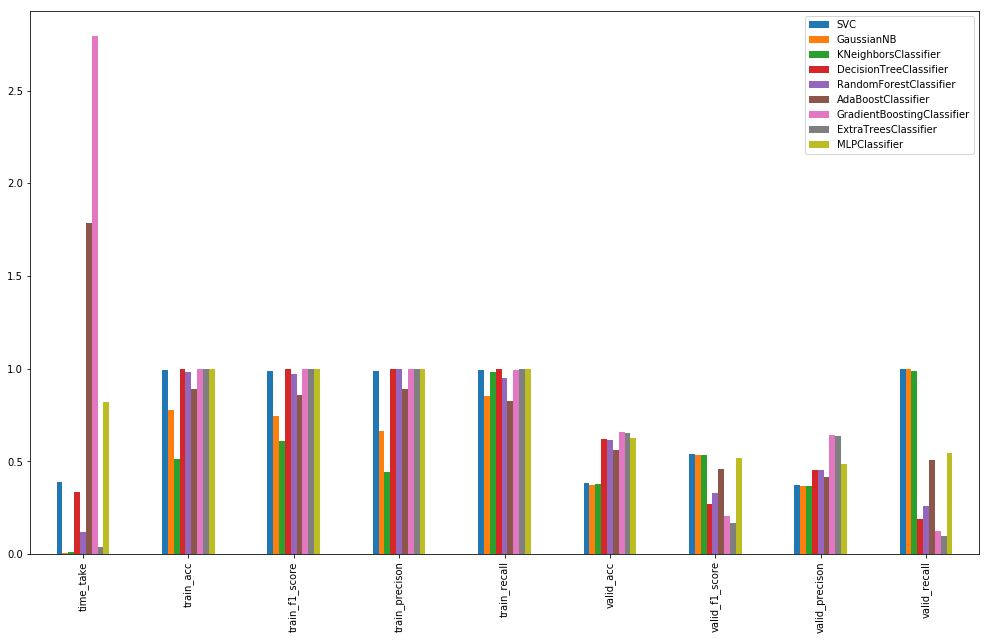

In [225]:
model_selection.T.plot(kind='bar', figsize = (17,10))

###### At this stage there are few points to be noted:
    a . Best base model is Logistic-Regression with val_acc of 69.5%.
    b . Next best model is GradientBoostingClassifier with val_acc of 65.67%.
    c . If we compare other metric like F1_score , still it is LogisticRegression.
    d . Ideally for binary classification this is fair and since we have naively considered
         this as dicotomous issue. In reality when we build the model , it would be multi-
         class classification problem and hence we have to abdicate logistic and fall on 
         some other statistical models like the GBT.
    c . Hence, even though logistic-regression came out as winner in this run, we will tune
        GBT since we need to enhance the classification from being binary to multiple.

##### Tune the GBT using grid-search and cross-validation

In [235]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 

In [236]:
GradientBoostingClassifier()
np.random.seed(31)

In [239]:
# dictionary of probable hyper-parameters
parameter = {'min_samples_split':list(range(2,20,3)),
             'min_samples_leaf':list(range(1,11)),
             'max_depth':list(range(3,50,5)),
             'max_features':list(range(15,30,2)),
             'learning_rate': [0.1,0.2,0.3,0.4],
             'n_estimators':[100,125,150,200,250,300,350,375,400,450,500],
             'subsample' : [.6,.7,.8,.9,1.0]}

In [240]:
# running for best hyper-parameters
strat_tm = time()

scorer = make_scorer(accuracy_score)
clf = GradientBoostingClassifier()
grid_obj = GridSearchCV(clf,param_grid=parameter,
                        scoring=scorer,cv=10,
                        n_jobs = -1)
grid_fit = grid_obj.fit(X_train,y_train)
best_clf = grid_fit.best_estimator_
base_pred = (clf.fit(X_train, y_train)).predict(X_valid)
best_pred = best_clf.predict(X_valid)

end_tm = time()

print('The prediction by base KNN validation set is : {}'.format(accuracy_score(y_valid, base_pred)),
      '\nThe prediction by optimized KNN on validation set is : {}'.format(accuracy_score(y_valid, best_pred)),
      '\nTime taken is : {:.4f} sec'.format(end_tm - start_tm))

KeyboardInterrupt: 